# This is a tutorial

## Libraries

In [416]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns #pip install seaborn
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import display, HTML #pip install ipython

## Step 1: Data Collection
In this step, we will gather interested data to explore. <br>
Source links: (for the csv files, check out this repository...)<br>
[1]https://ourworldindata.org/child-maltreatment-and-educational-outcomes <br>
[2]https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay <br>
[3]https://nces.ed.gov/programs/coe/indicator/cpb/college-enrollment-rate#:~:text=The%20overall%20college%20enrollment%20rate%20of%2018%2D%20to%2024%2Dyear,%2D%20or%204%2Dyear%20institutions <br>
[4]https://www.kaggle.com/datasets/shariful07/student-mental-health <br>
[5]https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success <br>
[6]https://nces.ed.gov/programs/coe/indicator/a01/violent-deaths-and-shootings <br>
[7]https://research.com/education/college-drug-abuse-statistics <br>

In [417]:
df_children_work = pd.read_csv('working-children-out-of-school-ages-7-14-vs-hours-worked-by-children-ages-7-14.csv')
df_usa_salary_potential = pd.read_csv('usa_salary_potential.csv')
df_usa_college_enroll_rate = pd.read_csv('usa_college_enroll_rate.csv')
df_usa_college_enroll_rate_enthnicity = pd.read_csv('usa_college_enroll_rate_ethnicity.csv')
df_malaysia_student_mental_health = pd.read_csv('malaysia_student_mental_health.csv')
df_usa_youth_violence_history = pd.read_csv('usa_youth_violence_history.csv')
df_drug_abuse_reasons = pd.read_csv('drug_abuse_top_reasons.csv')
df_europe_students = pd.read_csv('europe_college_student_data.csv', sep=';')

In [418]:
#If you want to see the whole table without the '...', you can use the following.
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

#If this is too much data, you can reset back to default (recommended).
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

def showTable(df, name):
    display(HTML(f"<div style='text-align:center;'><h4>{name}</h4></div>"))
    display(df)

Brief: Children working hours...

In [419]:
#showTable(df_children_work, 'Working children out of school vs. hours worked by children (age 7-14)')

Brief: Perhaps money is one thing that attracts people to go to universities. It is one of the motivations that drive students to persue higher education. add more...

In [420]:
#showTable(df_usa_salary_potential, 'Potential Salary for College Graduates (USA)')

Brief: We would like to see college enrollment rate and enthnicity rate because knowing this could help us understand more about students' identity and see part of the college environment. Since the United States is a culturally diverse country, student diversity will be an interesting factor to consider. You can exlpore more details on your own. 

In [421]:
#showTable(df_usa_college_enroll_rate, 'USA College Enroll Rate 2010 - 2021 for ages 18 to 24')
#showTable(df_usa_college_enroll_rate_enthnicity, 'USA College Enroll Rate 2010 - 2021 Ethnicity ages 18 to 24')

Brief: While students are in school, mental health could be an issue. Maybe it is because they want to work hard to get a good job, or to achieve something. The stress level in different courses could be an indicator of this. Here, we found data from International Islamic University Malaysia in year 2020 to show case this. (We are interested in age, course, and mental state.)

In [422]:
#showTable(df_malaysia_student_mental_health, 'Student Mental Health in International Islamic University Malaysia in year 2020')

Brief: We would also like to explore the violence from age 5 to 18. While the datasets for mental health and violence we have here are completely different from each other, we thought that since violence will get announced and spread across media, like school shootings in the U.S, so people might get worried or panic. From the statistic point of view, this dataset from the National Center for Education could let us see the number of violences. From the emotion point of view, we could 'start' to see students' view of violence. For more details, you would need to explore on your own. 

In [423]:
#showTable(df_usa_youth_violence_history, 'Violent Deaths at School and Away From School and School Shootings in USA (age 5-18)')

Brief: Drug abuse. This is a direct cause to education performance in common sense. Because it became common sense, we would like to know why. Here is a student dataset from the University of Sao Paulo to show this. 

In [424]:
#showTable(df_drug_abuse_reasons, 'Common Reasons for Drug Abuse')

Brief: Europe students...

In [425]:
#showTable(df_europe_students, 'Europe College Student Info')

Still alive? Keep reading.

## Step 2: Data Processing
Many times, the data we got is messy. In this process, we will clean some data. Check for NaN values and duplicate rows first. Drop uneccessary columns, and maybe change the column name if needed.

In [426]:
#df.columns
def peekData(df):
    print('---------------------------------------------------')
    print('Table NaN values count for each column\n') 
    print(df.isna().sum(), '\n')
    print('Table duplicated rows count', df.duplicated().sum(), '\n')
    print(df.info())
    print('---------------------------------------------------')

In [427]:
#peekData(df_children_work)

Observed: For the children work dataset, there are quite a lot of NaN values, so doing something like imputation won't work. In this case, we are interested in Entity, year, population, and child work hours. So, we can drop the rows that has NaN values in these columns to then see what result we get. Also, the column name is too long, so we will shorten the name.

In [428]:
#Don't need Continent and Code column, drop it.
df_children_work.drop(columns=['Continent'], inplace=True)

df_children_work.rename(
    columns={'Entity': 'Country',
             'Children in employment, work only (% of children in employment, ages 7-14)': 'Work_only_pct', 
             'Average working hours of children, study and work, ages 7-14 (hours per week)': 'Work_avg',
             'Population (historical estimates)': 'Population'}, 
    inplace=True
)

df_children_work[(df_children_work['Year'] >= 1999) & (df_children_work['Year'] <= 2016)]

df_children_work = df_children_work.dropna(subset=['Work_only_pct', 'Work_avg', 'Population'])

#if you want to double check, uncomment this line.
#peekData(df_children_work) 

#df_children_work

In [429]:
#peekData(df_usa_salary_potential)

Observed: For the USA college graduate postential salary, we care about the pay, so we will drop the irrelevant column "make_world_better_percent".

In [430]:
df_usa_salary_potential = df_usa_salary_potential.drop(columns=['make_world_better_percent'])
df_usa_salary_potential = df_usa_salary_potential.drop_duplicates(keep='last') #keep only one of the duplicated rows.
#df_usa_salary_potential

In [431]:
#peekData(df_usa_college_enroll_rate)
#peekData(df_usa_college_enroll_rate_enthnicity)

Observed: From the US college enroll and ethnicity rate table, we will get rid of the NaN values and then the last 2 rows (we can see why from Step 1 Data Collection). The column names look clean and the overall table is small. Easy to process :)

In [432]:
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.copy()
df_usa_college_enroll_rate = df_usa_college_enroll_rate.iloc[:-2, :-1] #get rid of last 2 rows and last column
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.iloc[:-2,:-1]

df_usa_college_enroll_rate_enthnicity.rename(
    columns = {
        'Race/ethnicity': 'Race',
        '2010-Standard Error': '2010-std-error',
        '2021-Standard Error': '2021-std-error'
    },
    inplace = True
)

#uncomment to double check
#df_usa_college_enroll_rate
#df_usa_college_enroll_rate_enthnicity

In [433]:
peekData(df_malaysia_student_mental_health)

---------------------------------------------------
Table NaN values count for each column

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64 

Table duplicated rows count 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 n

Observed: In the student mental health dataset, since there is only 1 missing value in the age column, probablly missing at random. We can take the age mean to fill the NaN value. Also, I would change the column names. The timestamp here does not interest us because it is only 2-3 months data in year 2020 (not wide enough), thus drop it. We will be interested in the servey question answers.

In [434]:
#Filling age with mean 
df_malaysia_student_mental_health["Age"].fillna(df_malaysia_student_mental_health["Age"].mean(),inplace=True)

#get rid of not interested columns
df_malaysia_student_mental_health.drop(columns=['Timestamp', 'Choose your gender'], inplace=True)

#rename long column names
df_malaysia_student_mental_health.rename(
    columns = {
        'What is your course?':'Course', 
        'Your current year of Study':'Your_current_year_of_study',
        'What is your CGPA?':'CGPA', 
        'Marital status':'Marital_status', 
        'Do you have Depression?':'Depression', 
        'Do you have Anxiety?':'Anxiety',
        'Do you have Panic attack?':'Panic_attack', 
        'Did you seek any specialist for a treatment?':'Treatment'}, 
    inplace = True
)

#df_malaysia_student_mental_health

In [435]:
#peekData(df_usa_youth_violence_history)

Observed: From the US youth violence dataset, we drop the 'Unnamed:4' column.

In [436]:
df_usa_youth_violence_history.drop(columns=['Unnamed: 4'], inplace=True)
#df_usa_youth_violence_history

Observed: From the drug abuse table, we will rename the features for clearer interpretation. We will also parse the percent feature values of their % signs for easier plotting later on.

In [437]:
# peekData(df_drug_abuse_reasons)

In [438]:
df_drug_abuse_reasons.rename(columns={'Category' : 'Reason'}, inplace=True)
df_drug_abuse_reasons.rename(columns={'Top Reasons For Drug Abuse Among College Students' : 'Percent'}, inplace=True)

df_drug_abuse_reasons['Percent'] = df_drug_abuse_reasons['Percent'].str.replace('%', '').astype(float)

In [439]:
# peekData(df_europe_students)

Observed: Good. For the Europe Student dataset, there is no need to clean the data!

## Step 3: Exploratory Data Analysis(EDA) & Visualization

### Children Labor Hours dataset EDA

The data for children work may not be perfect to visualize. However, let's first see the overall view, and then do a scatter plot.

In [440]:
df_children_work = df_children_work.sort_values(by='Year')

#Uncomment these to see details
#display(df_children_work)
years = df_children_work['Year'].unique()
#display(df_children_work.describe())

Let's do a visualization. First normalize the population. Although I care most about children work hours, it is also interesting to see the population at the same time. In seaborn, do sizes=(20, 300), which is like doing normalization. Why not standardize? Because I want to emphasize the proportions of the population, so normalization is good. If you want to emphasize the distribution of values, then standarization is good.

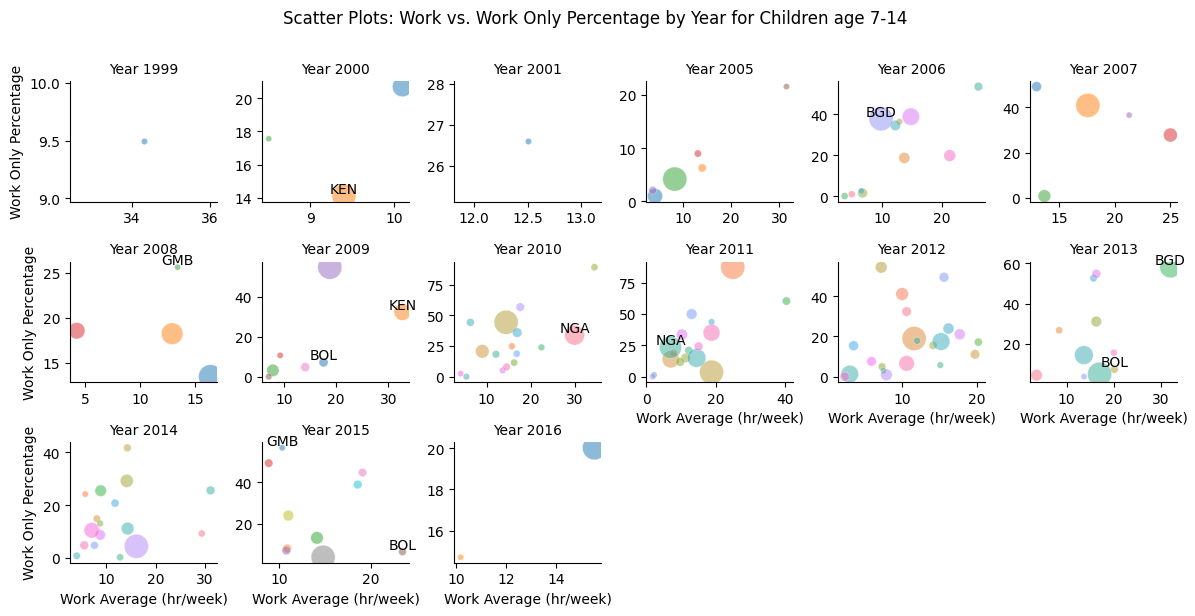

In [441]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

# Create a FacetGrid of scatter plots
g = sns.FacetGrid(df_children_work, col='Year', col_wrap=6, height=2, sharex=False, sharey=False)
g.map_dataframe(
    sns.scatterplot,
    x='Work_avg',
    y='Work_only_pct',
    size='Population',
    hue='Country',
    sizes=(20, 300),
    alpha=0.5,
)

g.set_titles(col_template="Year {col_name}")
g.set_axis_labels('Work Average (hr/week)', 'Work Only Percentage')
g.fig.suptitle('Scatter Plots: Work vs. Work Only Percentage by Year for Children age 7-14', y=1.02)
plt.subplots_adjust(top=0.9, hspace=0.5) 

#let's track some countries
track_countries = ['Nigeria', 'Gambia', 'Bangladesh', 'Kenya', 'Bolivia']

# Iterate through subplots and add annotations
for ax in g.axes.flat:
    year = ax.get_title().split(' ')[-1]
    data_year = df_children_work[df_children_work['Year'] == int(year)]
    for _, row in data_year.iterrows():
        if row['Country'] in track_countries:
            annotation_text = f"{row['Code']}"  # Combine country and year
            ax.annotate(annotation_text, (row['Work_avg'], row['Work_only_pct']),
                        textcoords="offset points", xytext=(0, 2), ha='center')

plt.show()

Explain: For each country there is a color. We can see from the plot, there are so many colorful "bubbles" that represent the population proportion. Also, not all countries have children work data for each year. However, by seeing the trend, we see that from 2006 to 2014, the children work hours increase as the points shifted a bit to the right and up. Places like KEN , BGD, and GMB showed some interesting data. Then add more here...

We learned from the children work plot that blablbalbl...there is a financial blablbalba... perhaps the potential salary after graduated from college is one of the motivations students to be successful in college. add more transition sentences here...

### USA College Potential Salaries by State dataset EDA

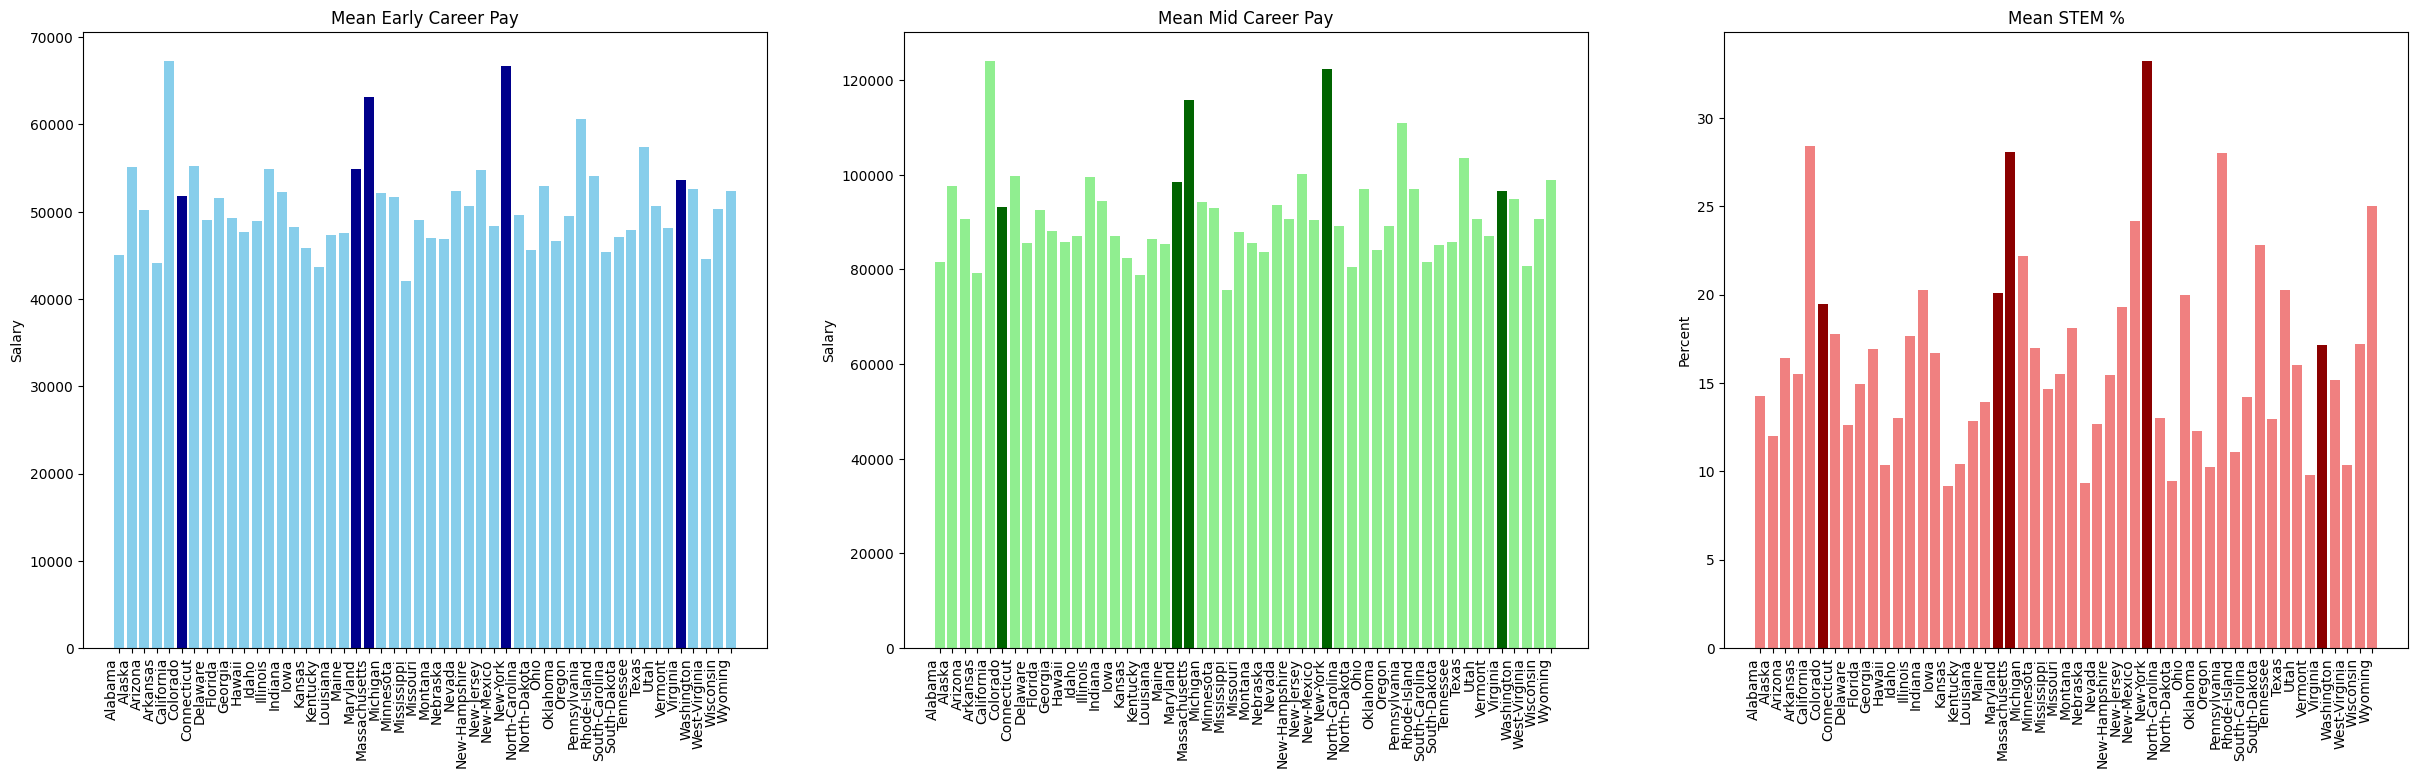

In [442]:
# We are more interested in the bigger picture, such as the State Data in the USA.
# We will extract some USA states we thought could be interesting to see since the education quality is well known.

targets = ['Maryland', 'Colorado',  'Massachusetts', 'Virginia', 'New-York']

# Calculate mean values for each state
mean_values = df_usa_salary_potential.groupby('state_name')[['early_career_pay', 'mid_career_pay', 'stem_percent']].mean().reset_index()

# Let's see some colorful plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))


bar_colors = ['skyblue' if state not in targets else 'darkblue' for state in mean_values['state_name']]
axes[0].bar(mean_values.index, mean_values['early_career_pay'], color=bar_colors)
axes[0].set_title('Mean Early Career Pay')
axes[0].set_ylabel('Salary')
axes[0].set_xticks(mean_values.index)
axes[0].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

bar_colors = ['lightgreen' if state not in targets else 'darkgreen' for state in mean_values['state_name']]
axes[1].bar(mean_values.index, mean_values['mid_career_pay'], color=bar_colors)
axes[1].set_title('Mean Mid Career Pay')
axes[1].set_ylabel('Salary')
axes[1].set_xticks(mean_values.index)
axes[1].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

bar_colors = ['lightcoral' if state not in targets else 'darkred' for state in mean_values['state_name']]
axes[2].bar(mean_values.index, mean_values['stem_percent'], color=bar_colors)
axes[2].set_title('Mean STEM %')
axes[2].set_ylabel('Percent')
axes[2].set_xticks(mean_values.index)
axes[2].set_xticklabels(mean_values['state_name'], rotation=90, ha='right')

# Show plot
plt.show()

Explain: the early potential salary for fresh college graduates are mostly in the range $40000 - $55000. Interestingly, California State has the highest average potential pay of all time, yet low STEM percentage. By looking at our target states (the dark highlighted bars), ..... Can money drive students success? Although we are not going to verify this in this tutorial due to the lack of data we could collect, we encourage you to explore this aspect because it might be useful. 

add transition paragraph to the next topic.

### USA College Enrollment rate & Ethnicity Enrollment rate dataset EDA

some intro here...

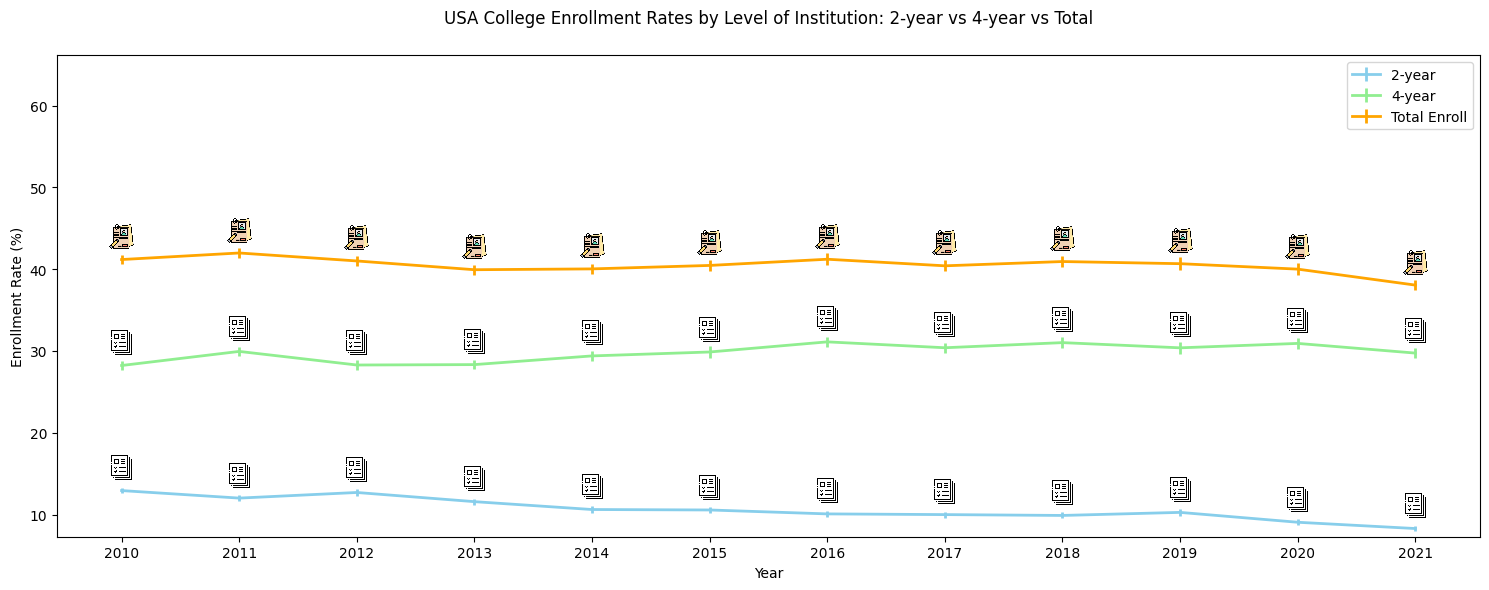

In [443]:
# Set up the plot
plt.figure(figsize=(15, 6))

# Load custom marker images
img_2_year = plt.imread('./marker1.png')
img_4_year = plt.imread('./marker1.png')
img_total = plt.imread('./marker2.png')

# Plot the lines
plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['2-year'], 
             yerr=df_usa_college_enroll_rate['2-year-Standard Error'], 
             marker='', color='skyblue', linewidth=2.0, label='2-year')

plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['4-year'], 
             yerr=df_usa_college_enroll_rate['4-year-Standard Error'], 
             marker='', color='lightgreen', linewidth=2.0, label='4-year')

plt.errorbar(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['Total'], 
             yerr=df_usa_college_enroll_rate['Total-Standard Error'], 
             marker='', color='orange', linewidth=2.0, label='Total Enroll')

# Add custom markers for 2-year and 4-year using AnnotationBbox
for year, y2, y4, total in zip(df_usa_college_enroll_rate['Year'], df_usa_college_enroll_rate['2-year'], 
                               df_usa_college_enroll_rate['4-year'], df_usa_college_enroll_rate['Total']):
    ab_2_year = AnnotationBbox(OffsetImage(img_2_year, zoom=0.035), (year, y2 + 2.8), frameon=False)
    plt.gca().add_artist(ab_2_year)
    ab_4_year = AnnotationBbox(OffsetImage(img_4_year, zoom=0.035), (year, y4 + 2.8), frameon=False)
    plt.gca().add_artist(ab_4_year)
    ab_total = AnnotationBbox(OffsetImage(img_total, zoom=0.035), (year, total + 2.8), frameon=False)
    plt.gca().add_artist(ab_total)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.title('USA College Enrollment Rates by Level of Institution: 2-year vs 4-year vs Total', y=1.05)
plt.legend()

plt.ylim(min(df_usa_college_enroll_rate['2-year']) - 1, max(df_usa_college_enroll_rate['4-year']) + 35)
plt.tight_layout()
plt.show()


Explain: blablablab

Talk about something with transition

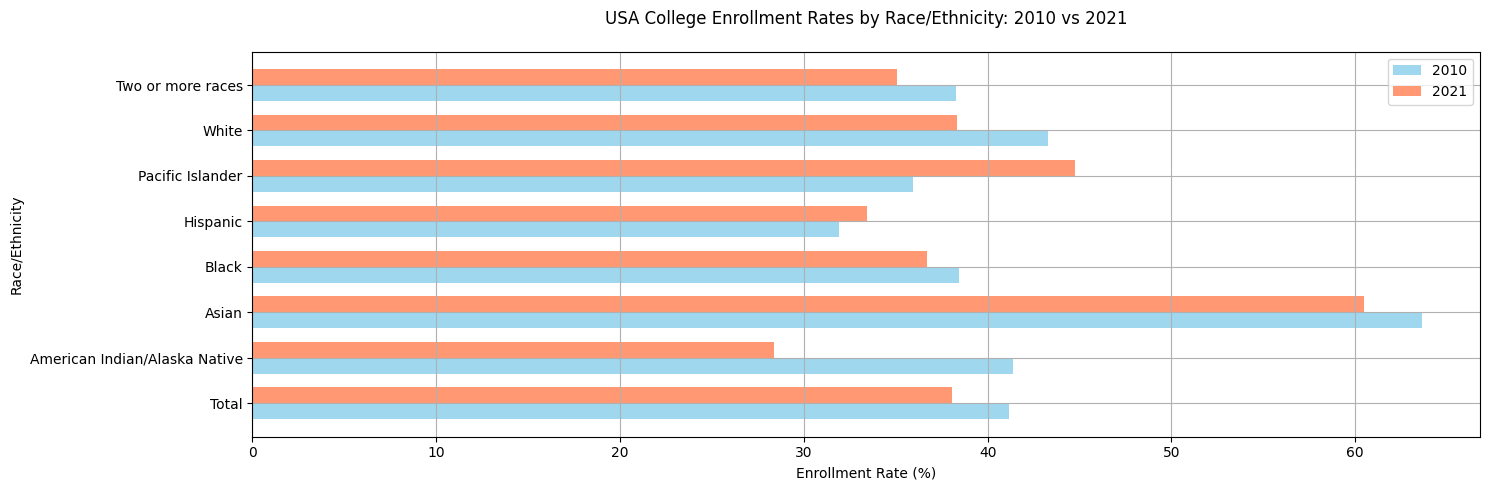

In [444]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Calculate the width of each bar group
bar_width = 0.35

# Create positions for the bars
positions_2010 = list(range(len(df_usa_college_enroll_rate_enthnicity)))
positions_2021 = [pos + bar_width for pos in positions_2010]

# Plot the bars for 2010 and 2021
plt.barh(positions_2010, df_usa_college_enroll_rate_enthnicity['2010'], height=bar_width, color='skyblue', alpha=0.8, label='2010')
plt.barh(positions_2021, df_usa_college_enroll_rate_enthnicity['2021'], height=bar_width, color='coral', alpha=0.8, label='2021')

# Set y-ticks and labels
plt.yticks([pos + bar_width / 2 for pos in positions_2010], df_usa_college_enroll_rate_enthnicity['Race'])

# Customize the plot
plt.xlabel('Enrollment Rate (%)')
plt.ylabel('Race/Ethnicity')
plt.title('USA College Enrollment Rates by Race/Ethnicity: 2010 vs 2021', y=1.05)
plt.legend()
plt.grid(True)
# Display the plot
plt.tight_layout()
plt.show()

Explain: blablabla

In [445]:
#TODO: this afternoon, continue malaysia student mental health and violence dataset viz.

### Drug Abuse Statistics EDA

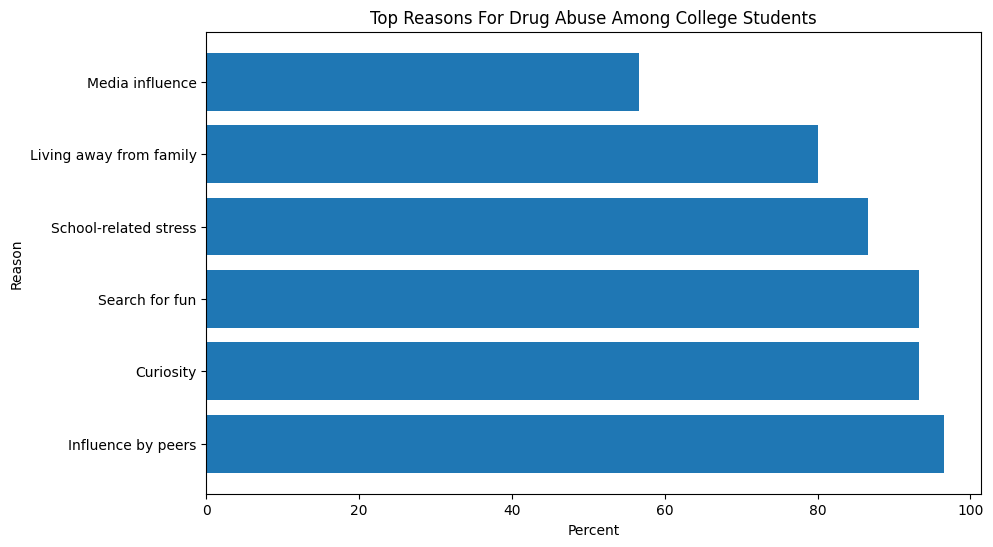

In [446]:
plt.figure(figsize=(10, 6))
plt.barh(df_drug_abuse_reasons['Reason'], df_drug_abuse_reasons['Percent'])
plt.xlabel('Percent')
plt.ylabel('Reason')
plt.title('Top Reasons For Drug Abuse Among College Students')
plt.show()

The Europe dataset is quite large with 36 features available to us. We will choose to focus in on only a handful of these features and build a decision tree from it that will help classify a student as a dropout, student, or graduate.

## Step 4: Model: Analysis, Hypothesis Testing, & ML

In [447]:
# TODO: Move to top once libraries are finalized 
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from IPython.display import Image
import pydotplus

Let's find the correlation of our label with the different features in the dataframe. First, we will encode our three label categories as 0, 1, or 2. 

In [448]:
df_europe_students['Target'] = df_europe_students['Target'].map({
    'Enrolled': 1,
    'Graduate': 2,
    'Dropout': 0,
})

Let's verify the target label has changed from type object. 

In [449]:
df_europe_students.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

We can also verify our encoding works by running describe() and checking our target column.

In [450]:
df_europe_students.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


There are a large number of features in the Europe dataset. Let's extract only the ones that we're interested in.

In [451]:
kept_features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
            'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation",
            "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
            'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
            'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

df_europe_students = df_europe_students[kept_features]

Now that we've finalized our features to analyze, what are the ranges of unique values for each?

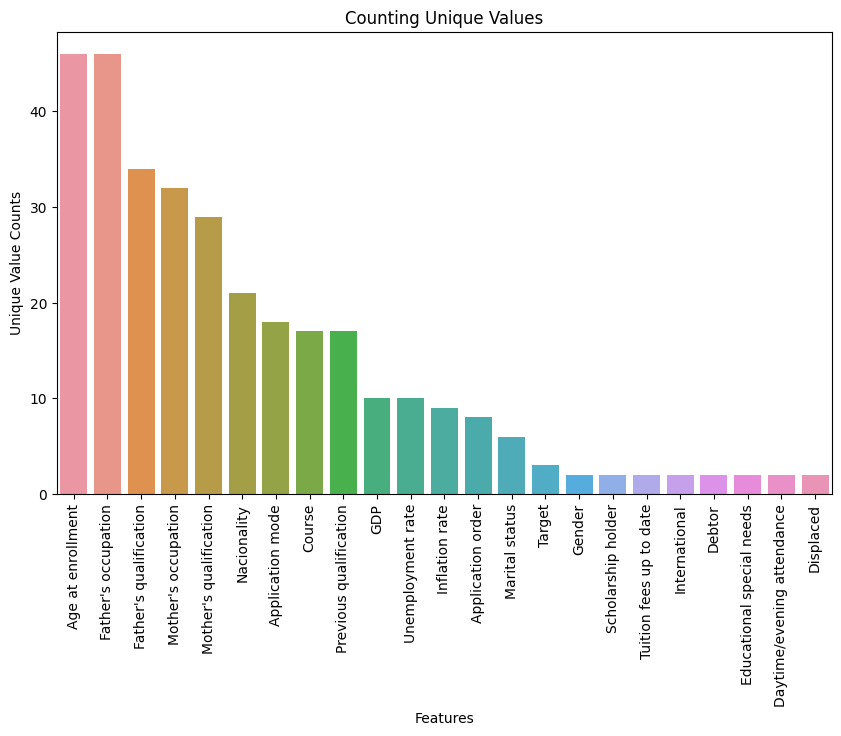

In [452]:
unique_counts = df_europe_students.nunique()

unique_counts_sorted = unique_counts.sort_values(ascending=False)

plt.figure(figsize=(10,6))

ax= sns.barplot(x=unique_counts_sorted.index, y=unique_counts_sorted.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Features')
plt.ylabel('Unique Value Counts')
plt.title('Counting Unique Values')
plt.show()

We can see there's quite a large spread from binary classifications (i.e. displacement, and international student status) to features with up to 40+ values like age at enrollment.

Next, let's generate a correlation matrix to analyze the relationship between features

Text(0.5, 1.0, 'Correlation Matrix')

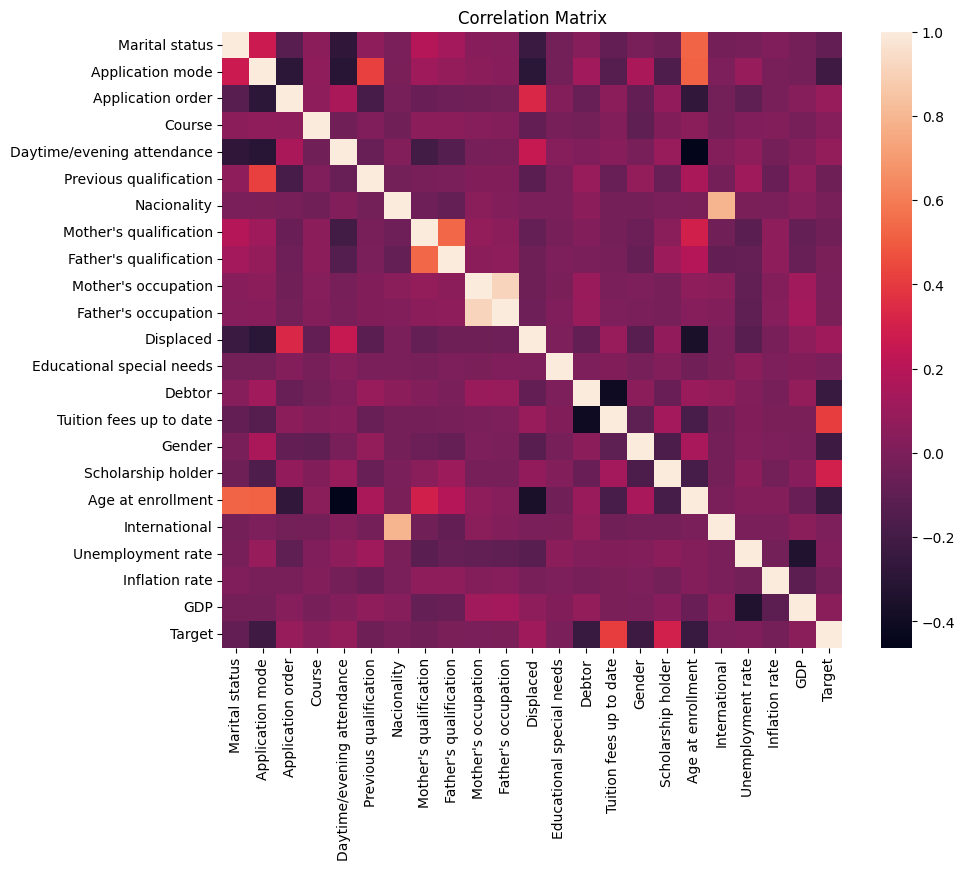

In [453]:
corr_matrix = df_europe_students.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')

Let's focus in on the correlation between our features and the target label specifically. 

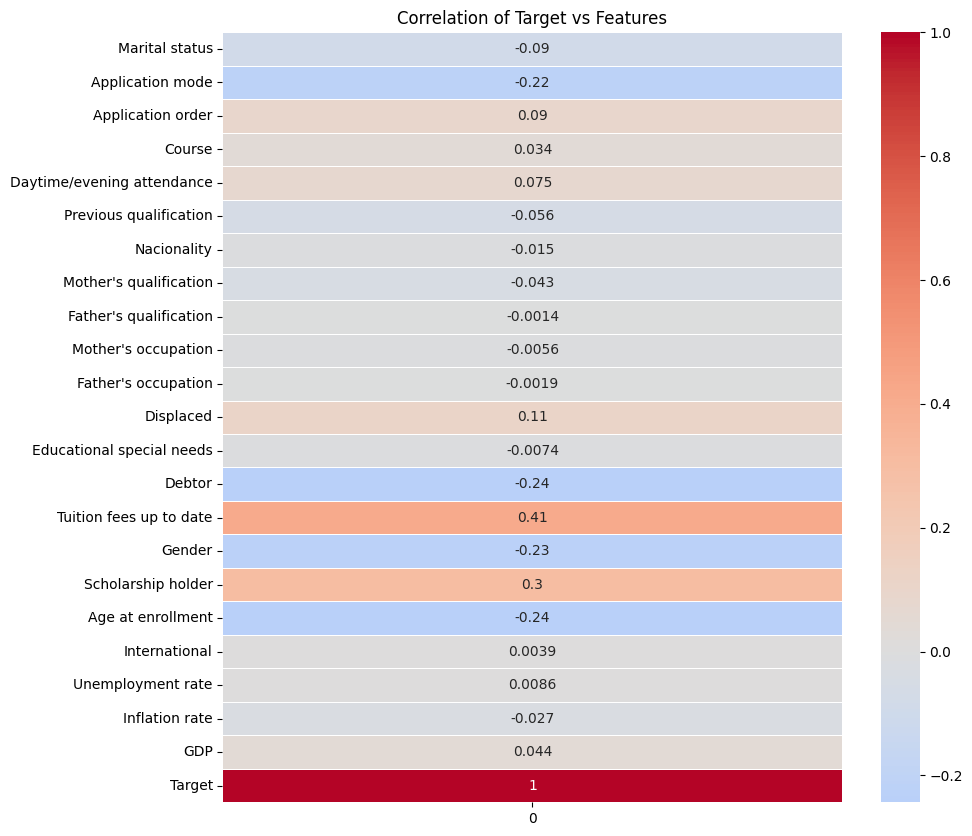

In [454]:
target_corr = df_europe_students.corrwith(df_europe_students['Target'])
plt.figure(figsize=(10, 10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation of Target vs Features')
plt.show()

Based on the results of the heatmap, let's extract the k highest correlated features to our target label. While correlation does not imply causation, we can reason to why this may be occurring. 

In [455]:
# Set the value of k (number of highest correlations to extract)
k = 5

target_corr = corr_matrix['Target']
target_corr = target_corr.sort_values(ascending=False)[1:(k + 1)]

print("Top", k, "highest correlations:")
print(target_corr)

Top 5 highest correlations:
Tuition fees up to date       0.409827
Scholarship holder            0.297595
Displaced                     0.113986
Application order             0.089791
Daytime/evening attendance    0.075107
Name: Target, dtype: float64


TODO: Comment on why it might be that these are the most correlated with the target label

Let's try building a decision tree to predict the status of a prospective student.

TODO: maybe it's worth only limiting predictions to dropout or graduate? could see increase in model success

In [456]:
X = df_europe_students.drop('Target', axis=1)
y = df_europe_students['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [457]:
# TODO: Remove this cell for final submission, just for testing purposes and optimizing the model
# To optimize random_state and max_depth
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'random_state': randint(0, 101),  # Random values between 0 and 100
    'max_depth': range(1, 11)  # Range of max_depth values from 0 to 10
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(criterion="entropy"),
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
)

random_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params, best_score)

{'max_depth': 7, 'random_state': 12} 0.6253118532192203


In [458]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=best_params['max_depth'], random_state=best_params['random_state'])

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 63.28%


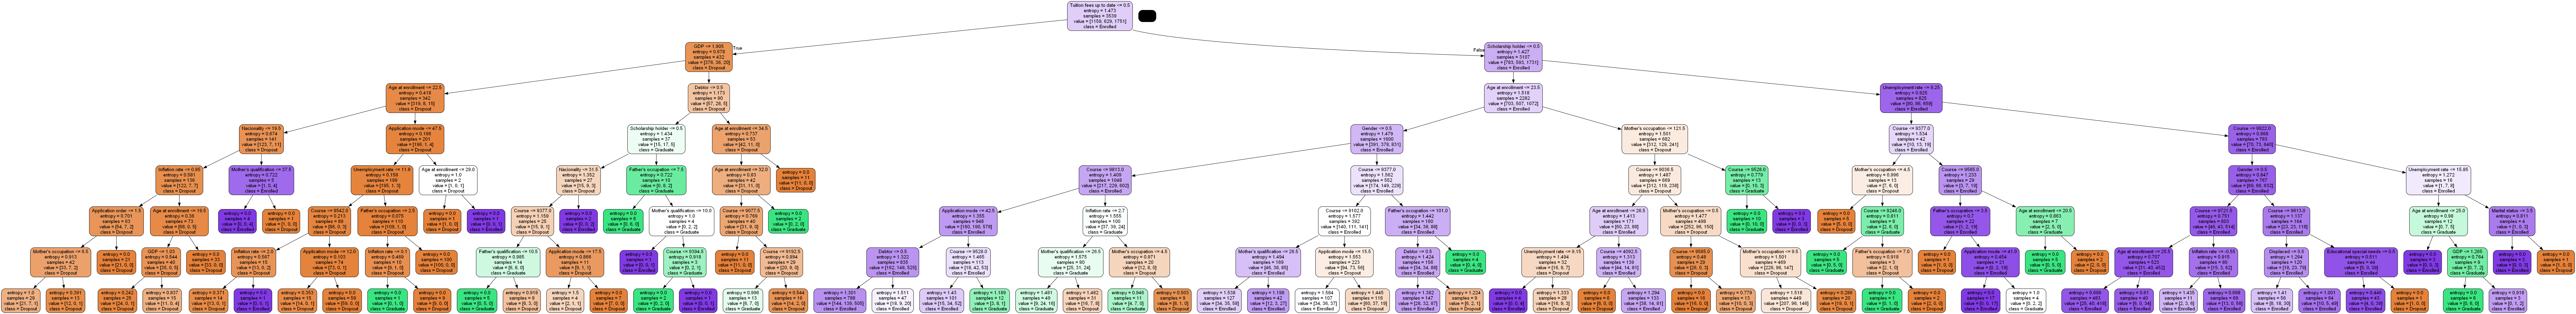

In [459]:
feature_cols = df_europe_students.drop('Target', axis=1).columns

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())